In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from glob import glob
import numpy as np
from PIL import Image

## 1. Quantitative Evaluation

In [2]:
import os
import platform
if platform.system() == 'Darwin':
    DATA_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Data.nosync"
    ROOT_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Thesis"
elif platform.system() == 'Linux':
    DATA_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync"
    ROOT_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Thesis"

current_wd = os.getcwd()

In [3]:
def read_timestamp_file(path):
    with open(path, 'rb') as f:
        lines = f.readlines()
    data = []
    for i in range(0, len(lines), 2):
        if b'**Best**' in lines[i]:
            continue
        step_number = int(lines[i].decode().split('-')[1].strip().strip(','))
        values = ast.literal_eval(lines[i+1].decode().strip())
        values['Step'] = step_number
        data.append(values)

    df = pd.DataFrame(data)
    df.set_index('Step', inplace=True)
    return df

In [12]:
model_out_dir = f"{DATA_PATH}/Models/hyperstyle/00005_snapshot_1200_restyle_77000"
log_path1 = f"{model_out_dir}/checkpoints/timestamp.txt"
log1 = read_timestamp_file(log_path1)
log_path2 = f"{model_out_dir}/resume/checkpoints/timestamp.txt"
log2 = read_timestamp_file(log_path2)
log2.index = log2.index + 40000

log = pd.concat([log1, log2])

min_loss = log.iloc[log.loss.argmin()]
print(f"Minimum Loss: {min_loss.loss} at step {min_loss.name}")

Minimum Loss: 0.07947484838054669 at step 70000


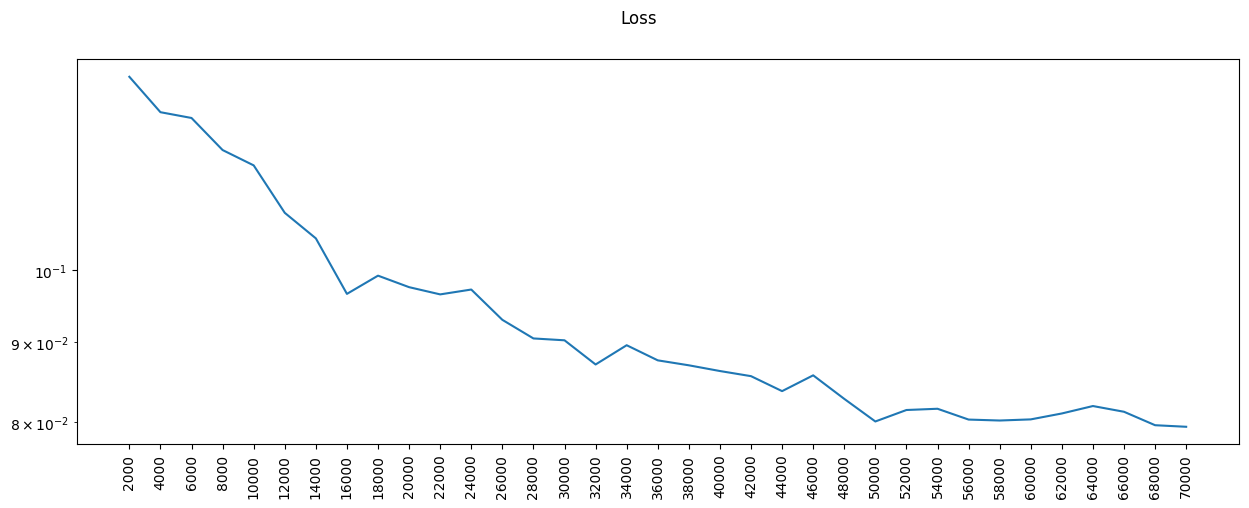

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
plt.xticks(log.index)
ax.set_xticklabels(log.index, rotation=90)
plt.yscale('log')
plt.plot(log.loss)
fig.suptitle('Loss')
plt.show()

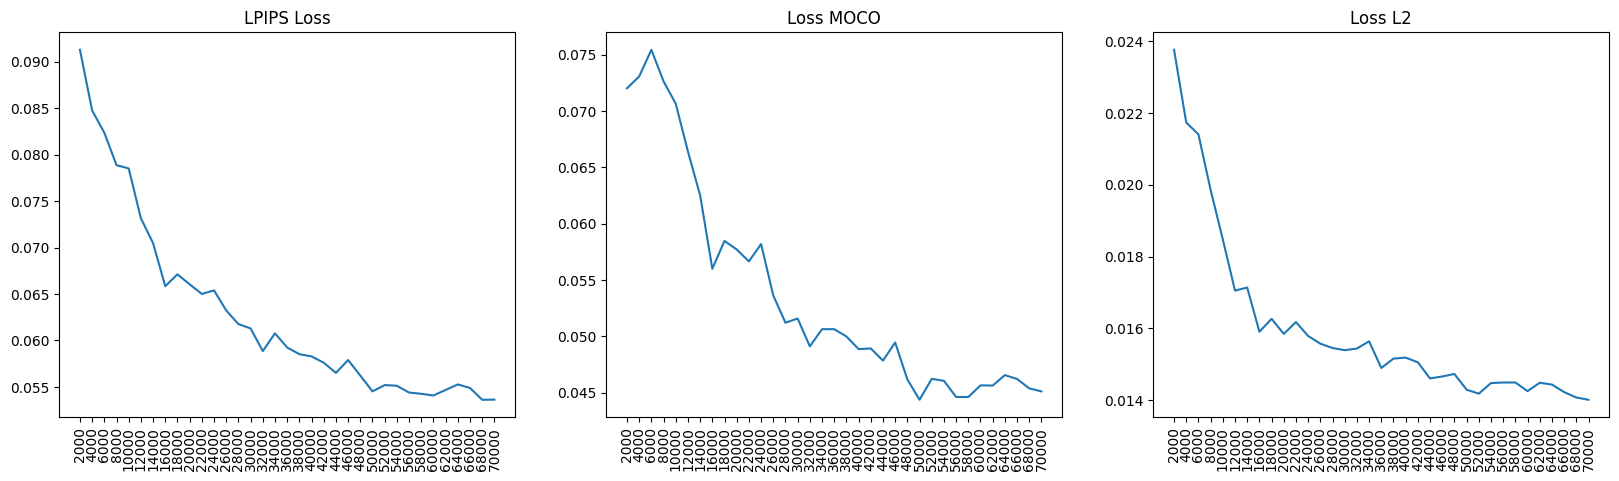

In [14]:
fig, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].plot(log.loss_lpips)
ax[0].set_title('LPIPS Loss')
ax[0].set_xticks(log.index)
ax[0].set_xticklabels(log.index, rotation=90)

ax[1].plot(log.loss_moco)
ax[1].set_title('Loss MOCO')
ax[1].set_xticks(log.index)
ax[1].set_xticklabels(log.index, rotation=90)

ax[2].plot(log.loss_l2)
ax[2].set_title('Loss L2')
ax[2].set_xticks(log.index)
ax[2].set_xticklabels(log.index, rotation=90)
plt.show()

### Qualitative Evaluation

In [ ]:
real_images = glob(f"{DATA_PATH}/Zalando_Germany_Dataset/dresses/images/e4e_images/all/*.jpg")
reconstructions_base_path = f"{DATA_PATH}/Generated_Images/hyperstyle/inference_results/"


# For now: Filter to exising images
recons = glob(f"{reconstructions_base_path}4/*.jpg")
recons = [elem.split('/')[-1].split('.')[0] for elem in recons]
real_images = [elem for elem in real_images if elem.split('/')[-1].split('.')[0] in recons]

samples = list(np.random.choice(real_images, 10))
#
fig, ax = plt.subplots(len(samples), 6, figsize = (20, len(samples)*5))
for i, sample in enumerate(samples):
    for j in range(5):
        ax[i, j].imshow(Image.open(f"{reconstructions_base_path}{j}/{sample.split('/')[-1].split('.')[0]}.jpg"))
        ax[i, j].set_title(f'Restyle Step {j}')

    ax[i, 5].imshow(Image.open(sample))
    ax[i, 5].set_title('Original')

for axs in ax.flatten():
    axs.axis('off') 

plt.show()